# Credit Card Fraud Detection

This notebook presents the implementation and performance comparison of machine learning classifiction models - as well as a simple deep learning neural network - in detection of fraudulent credit card transactions.

The notebook further concerns itself with appropriate data preprocessing method as well as the prioritization of model evaluation metrics in the context of the considered problem.

The content of the notebook is organized as follows:
1. Data Exploration and Preprocessing
2. Models
    - Logistic Regression
    - Random Forest
    - Adaptive Boosting
    - Neural Network
    - Voting Classifier
3. Conclusions

## Data

The dataset used in this notebook is the [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) dataset from Kaggle.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. The dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

---

The key features of the dataset are as follows:
- `Time`: Number of seconds elapsed between this transaction and the first transaction in the dataset
- `V1-V28`: Anonymized features representing transaction attributes (obfuscated for privacy reasons)
- `Amount`: Transaction amount
- `Class`: The target variable, where 1 indicates a fraudulent transaction and 0 indicates a legitimate transaction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/creditcard.csv')
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Share of frodulent/non-frodulent transactions

The dataset is **highly imbalanced**, with fraudulent transactions accounting for only 0.17% of the total number of transactions. This imbalance is particularly important considering the nature of the problem calls for **high recall** rates in detecting fraudulent transactions. Appropriate preprocessing techniques and cross validation scoring metrics have to be chosen to address this issue and prevent bias towards the majority class.

Non-fordulent transactions: 284315
Frodulent transactions: 492
Share of non-frodulent transactions: 99.83 %
Share of frodulent transactions: 0.17 %


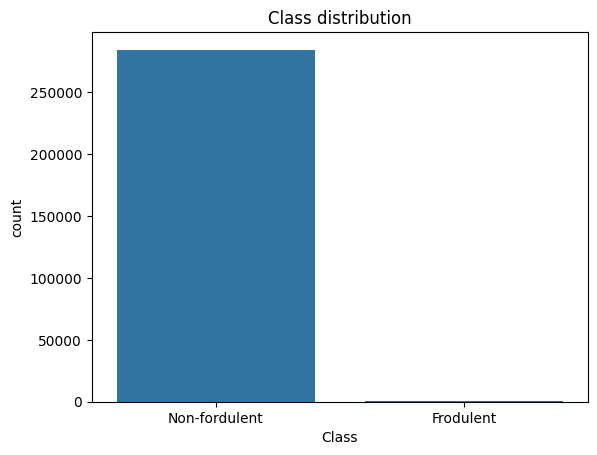

In [3]:
non_frodulent_transactions = data['Class'].value_counts()[0]
frodulent_transactions = data['Class'].value_counts()[1]

transaction_countplot = sns.countplot(x='Class', data=data)
transaction_countplot.set_xticks(transaction_countplot.get_xticks())
transaction_countplot.set_xticklabels(['Non-fordulent', 'Frodulent'])
plt.title('Class distribution')

print(f'Non-fordulent transactions: {non_frodulent_transactions}')
print(f'Frodulent transactions: {frodulent_transactions}')
print(f'Share of non-frodulent transactions: {round(non_frodulent_transactions/len(data) * 100, 2)} %')
print(f'Share of frodulent transactions: {round(frodulent_transactions/len(data) * 100, 2)} %')

### Data preprocessing

The data preprocessing consists of two standard steps:
1. **Scaling**: The dataset features are scaled using the `MinMaxScaler`.
2. **Synthetic Minority Over-sampling Technique (SMOTE)**: To address the imbalance in class distribution, the minority class is oversampled using the SMOTE technique. The influence and importance of this step is further demonstrated in the model evaluation section where a logistic regression model is trained on both the original and SMOTE-augmented datasets.

In [4]:
from sklearn.preprocessing import MinMaxScaler

_X = data.drop("Class", axis=1)

func_1 = lambda x: np.floor(np.log10(x.max()))
func_2 = lambda x: np.floor(np.log10(x.max() - x.min()))

max_feature_val_magn = _X.apply(func_1)
max_feature_val_magn_range = max_feature_val_magn.max() - max_feature_val_magn.min()

feature_val_magn_diff = _X.apply(func_2)
feature_val_magn_diff_range = feature_val_magn_diff.max() - feature_val_magn_diff.min()

scaler = MinMaxScaler()
_X_scaled = pd.DataFrame(scaler.fit_transform(_X), columns=_X.columns)

max_feature_val_magn_scaled = _X_scaled.apply(func_1)
max_feature_val_magn_range_scaled = max_feature_val_magn_scaled.max() - max_feature_val_magn_scaled.min()

feature_val_magn_diff_scaled = _X_scaled.apply(func_2)
feature_val_magn_diff_range_scaled = feature_val_magn_diff_scaled.max() - feature_val_magn_diff_scaled.min()

print('Difference between max and min largest feature value magnitudes')
print(f'Before scaling: {max_feature_val_magn_range}')
print(f'After scaling: {max_feature_val_magn_range_scaled}')
print('\nDifference between max and min feature value magnitude ranges')
print(f'Before scaling: {feature_val_magn_diff_range}')
print(f'After scaling: {feature_val_magn_diff_range_scaled}')

Difference between max and min largest feature value magnitudes
Before scaling: 5.0
After scaling: 1.0

Difference between max and min feature value magnitude ranges
Before scaling: 5.0
After scaling: 1.0


In [5]:
from sklearn.model_selection import train_test_split

X = data.drop("Class", axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

scaler = MinMaxScaler()
scaler.fit(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print('Distribution of classes in training set')
print('\nBefore synthetic oversampling:')
print(y_train.value_counts().rename({0: 'Non-frodulent', 1: 'Frodulent'}).to_string(header=False))
print('\nAfter synthetic oversampling:')
print(y_train_smote.value_counts().rename({0: 'Non-frodulent', 1: 'Frodulent'}).to_string(header=False))

Distribution of classes in training set

Before synthetic oversampling:
Non-frodulent    227451
Frodulent           394

After synthetic oversampling:
Non-frodulent    227451
Frodulent        227451


## Models

This notebook presents the performance of the following six models in detecting fraudulent credit card transactions:
1. **Logistic Regression**
2. **Random Forest**
3. **Adaptive Boosting**
4. **K-Nearest Neighbors**
5. **Neural Network**
6. **Voting Classifier**

### Evaluation metrics

Given the highly imbalanced nature of the dataset as well as the importance of detecting fraudulent transactions, the two key evaluation metrics considered in this notebook are:
- **Recall**: in the case of credit card fraud *false positives* are generally significantly less costly than *false negatives*. It is better to flag a legitimate transaction for review than to miss a fraudulent one.

- **F1 Score**: while recall is the primary metric which, if low, can automatically disqualify a model, the F1 score is also crucial as an overall measure of model performance. A good model has to flag the overwhelming majority of fraudulent transactions but not at the expense of unfeasibly high proportion of false positive reports.

To further emphasize the importance of recall, the **ROC AUC** metric is used for cross-validation. The metric is chosen to maximize recall while minimizing the false positive rate.

For a helpful single number model evaluation metric a product of **Recall** raised to the power of `overall_score_recall_factor` and **F1 Score** raised to the power of `overall_score_f1_factor` is used as the **Overall Score**. The choice of the factors is arbitrary and can be adjusted to shift the emphasis between the two metrics. However, in accordance with the outlined reasoning it is expected that the recall factor should be larger than `1` and the F1 factor should be smaller than `1`. For the purpose of this notebook the factors are set to `2` and `1/3` respectively to heavily penalize low recall while still taking into account the overall model performance and penalizing low precision.

$Overall Score = Recall^2 * \sqrt[3]{\text{F1}}$

To rerun the notebook with different factors, simply adjust the `overall_score_recall_factor` and `overall_score_f1_factor` variables below.

In [7]:
overall_score_recall_factor = 2
overall_score_f1_factor = 1/3

def calculate_overall_score(recall, f1):
    return recall**overall_score_recall_factor * f1**overall_score_f1_factor

In [8]:
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

### Helper functions

In [53]:
def _present_model(model, prediction, y_test, prediction_transform=None):
  if prediction_transform is not None:
    prediction = prediction_transform(prediction)
  
  accuracy = metrics.accuracy_score(y_true=y_test, y_pred=prediction)
  precision = metrics.precision_score(y_true=y_test, y_pred=prediction)
  recall = metrics.recall_score(y_true=y_test, y_pred=prediction)
  f1 = metrics.f1_score(y_true=y_test, y_pred=prediction)
  overall_score = calculate_overall_score(recall, f1)

  confusion_matrix_heatmap = sns.heatmap(metrics.confusion_matrix(y_true=y_test, y_pred=prediction),
                                         annot=True)
  confusion_matrix_heatmap.set_xticklabels(['Detected non-frodulent', 'Detected frodulent'])
  confusion_matrix_heatmap.set_yticklabels(['Non-frodulent', 'Frodulent'])

  print(model)
  print(f'Accuracy: {accuracy:.6f}\nPrecision: {precision:.6f}\n'
        f'Recall: {recall:.6f}\nF1: {f1:.6f}\n'
        f'Overall score: {overall_score:.6f}')
  
  return {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'overall_score': overall_score
  }

def present_model(model, prediction, prediction_transform=None):
  return _present_model(model, prediction, y_test, prediction_transform)

In [10]:
def plot_grid_search_cv_hyperparams_heatmap(grid_search_cv,
                                            param1,
                                            param2,
                                            score_metric='mean_test_score',
                                            score_fmt='.3f',
                                            cmap='viridis',
                                            figsize=(10, 6),
                                            param1_values_transformation=None,
                                            param2_values_transformation=None):
    cv_results = pd.DataFrame(grid_search_cv.cv_results_)
    heatmap_data = cv_results.pivot(index=f'param_{param2}', columns=f'param_{param1}', values=score_metric)

    if param1_values_transformation:
        heatmap_data.columns = heatmap_data.columns.map(param1_values_transformation)
    if param2_values_transformation:
        heatmap_data.index = heatmap_data.index.map(param2_values_transformation)

    plt.figure(figsize=figsize)
    sns.heatmap(heatmap_data,
                annot=True,
                fmt=score_fmt,
                cmap=cmap,
                cbar_kws={'label': score_metric.replace('_', ' ').capitalize()})
    plt.title('Grid Search CV Results')
    plt.xlabel(param1)
    plt.ylabel(param2)
    plt.show()

### Logistic Regression

The first model considered in this notebook is the logistic regression model. The model is trained on the original and SMOTE-augmented datasets to demonstrate the importance of addressing the class imbalance.

In [11]:
from sklearn.linear_model import LogisticRegression

logistic_regression_grid_search_params = {
    'estimator': LogisticRegression(random_state=42, max_iter=1000),
    'param_grid': {'C': np.logspace(3, 9, 7), 'penalty': ['l2']},
    'scoring': 'roc_auc',
    'cv': 3
}

#### Using non-SMOTE data

In [12]:
_lrm_cv = GridSearchCV(**logistic_regression_grid_search_params)
_lrm_cv.fit(X_train_scaled, y_train);

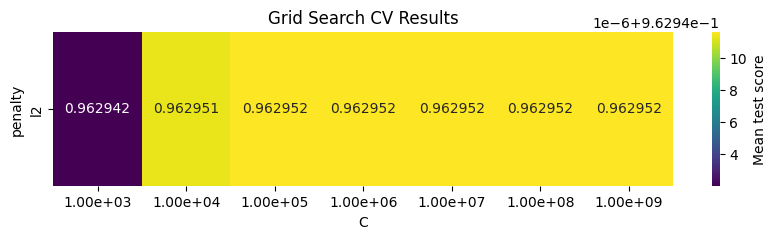

Tuned hpyerparameters: C=1.00e+06, penalty=l2
ROC AUC: 0.962952


In [13]:
plot_grid_search_cv_hyperparams_heatmap(grid_search_cv=_lrm_cv,
                                        param1='C',
                                        param2='penalty',
                                        score_fmt='.6f',
                                        figsize=(10, 2),
                                        param1_values_transformation=lambda x: f'{x:.2e}')

best_C = _lrm_cv.best_params_['C']
best_penalty = _lrm_cv.best_params_['penalty']
best_score = _lrm_cv.best_score_

print(f'Tuned hpyerparameters: C={best_C:.2e}, penalty={best_penalty}')
print(f'ROC AUC: {best_score:.6f}')

LogisticRegression(C=1000000.0, max_iter=1000, random_state=42)
Accuracy: 0.999105
Precision: 0.813333
Recall: 0.622449
F1: 0.705202
Overall score: 0.344862


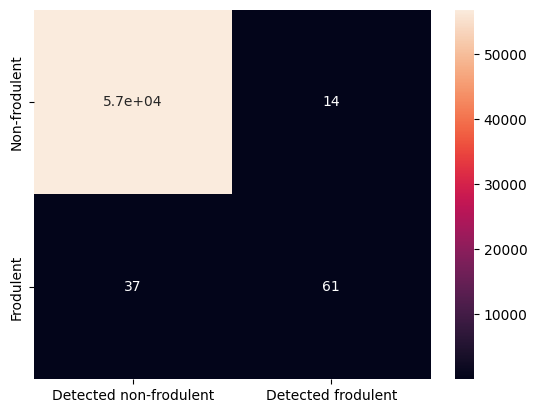

In [55]:
_lrm_cv_best = _lrm_cv.best_estimator_
present_model(_lrm_cv_best, _lrm_cv_best.predict(X_test_scaled));

When the model is trained on scaled but not oversampled data even when scoring on ROC AUC the model performs very poorly when it comes to **recall**. The bias towards the majority class is evident in the model's inability to detect fraudulent transactions at a rate significantly higher than random guessing. Despite over 99% **accuracy** and relatively high **precision** the model is not suitable for the considered problem.

#### Using scaled and oversampled data

In [15]:
lrm_cv = GridSearchCV(**logistic_regression_grid_search_params)
lrm_cv.fit(X_train_smote, y_train_smote);

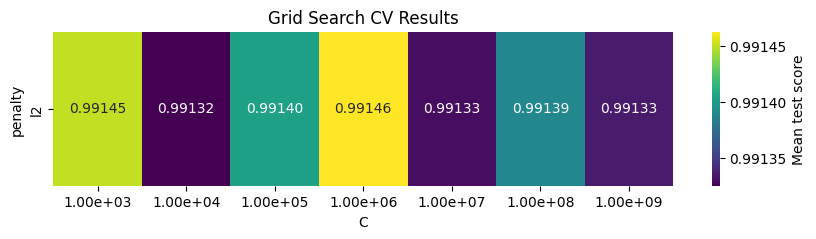

Tuned hpyerparameters: C=1.00e+06, penalty=l2
ROC AUC: 0.991463


In [16]:
plot_grid_search_cv_hyperparams_heatmap(grid_search_cv=lrm_cv,
                                        param1='C',
                                        param2='penalty',
                                        score_fmt='.5f',
                                        figsize=(10, 2),
                                        param1_values_transformation=lambda x: f'{x:.2e}')

best_C = lrm_cv.best_params_['C']
best_penalty = lrm_cv.best_params_['penalty']
best_score = lrm_cv.best_score_

print(f'Tuned hpyerparameters: C={best_C:.2e}, penalty={best_penalty}')
print(f'ROC AUC: {best_score:.6f}')

LogisticRegression(C=1000000.0, max_iter=1000, random_state=42)
Accuracy: 0.973737
Precision: 0.057034
Recall: 0.918367
F1: 0.107399
Overall score: 0.400897


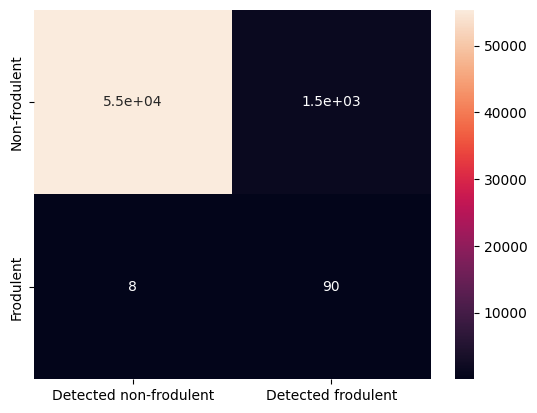

In [58]:
lrm_cv_best = lrm_cv.best_estimator_
lrm_metrics = present_model(lrm_cv.best_estimator_, lrm_cv_best.predict(X_test_scaled))

When the model is trained on the SMOTE-augmented dataset the model's **recall** performance improves significantly. The model is able to detect fraudulent transactions at a rate of over 90% at the expense of drastically lower **precision**. While the **Overall Score** of this model is higher than the one trained on the original dataset, the model is still not really suitable for the considered problem with only about 6% of the flagged transactions being actually fraudulent.

As can be seen in the following sections models such as **Random Forest** or **K Nearest Neighbors** are able to achieve better performance - maintaining high recall while significantly improving precision.

### Random Forest

The Random Forest model is trained on the scaled and oversampled dataset. The model performs better than the logistic regression model in terms of **precision** while maintaining a relatively high **recall** rate.

In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest_grid_search_params = {
    'estimator': RandomForestClassifier(random_state=42),
    'param_grid': {'n_estimators': [15, 30, 45], 'max_depth': [4, 6, 8]},
    'scoring': 'roc_auc',
    'cv': 3
}

In [19]:
rfm_cv = GridSearchCV(**random_forest_grid_search_params)
rfm_cv.fit(X_train_smote, y_train_smote);

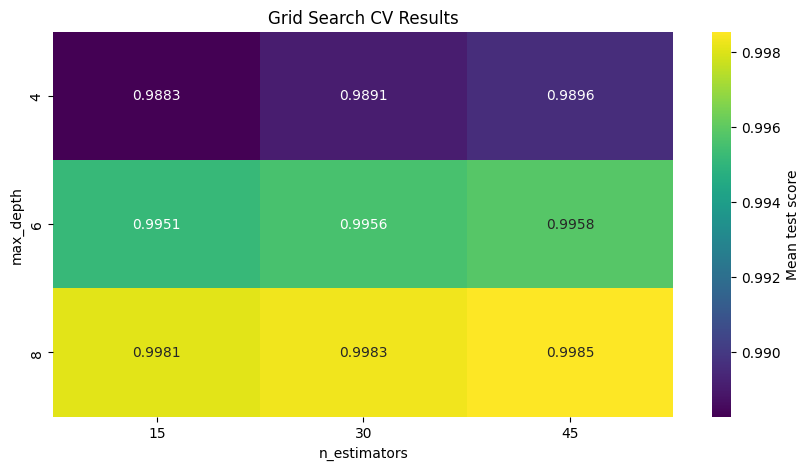

Tuned hpyerparameters: n_estimators=45, max_depth=8
ROC AUC: 0.998537


In [20]:
plot_grid_search_cv_hyperparams_heatmap(grid_search_cv=rfm_cv,
                                        param1='n_estimators',
                                        param2='max_depth',
                                        score_fmt='.4f',
                                        figsize=(10, 5))

best_n_estimators = rfm_cv.best_params_['n_estimators']
best_max_depth = rfm_cv.best_params_['max_depth']
best_score = rfm_cv.best_score_

print(f'Tuned hpyerparameters: n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'ROC AUC: {best_score:.6f}')

RandomForestClassifier(max_depth=8, n_estimators=45, random_state=42)
Accuracy: 0.995804
Precision: 0.277603
Recall: 0.897959
F1: 0.424096
Overall score: 0.605808


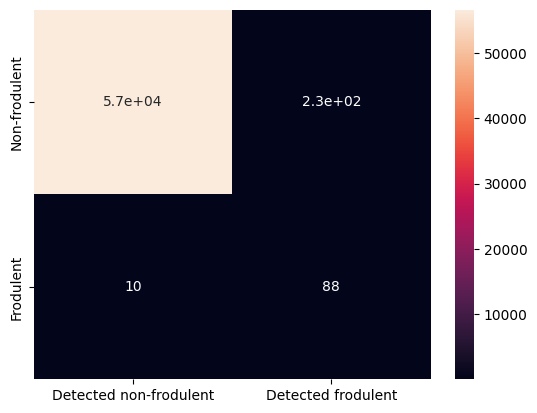

In [57]:
rfm_cv_best = rfm_cv.best_estimator_
rfm_metrics = present_model(rfm_cv_best, rfm_cv_best.predict(X_test_scaled))

As expected, the Random Forest model performs better than logistic regression, achieving almost as high **recall** while maintaining higher, albeit still low, **precision**.
Furthermore (unsurprisingly) the grid search CV results suggest better performance with higher number of estimators and higher maximum depth of the trees (the Grid Search CV was performed with smaller ranges of hyperparameters due to computational constraints). As such, the Random Forest classifier should perform even better with a wider range of hyperparameters tested.

Below, a much larger random forest, with 150 estimators and maximum depth of 12, is trained and evaluated to further demonstrate this point.

In [22]:
rfm_large = RandomForestClassifier(n_estimators=150,
                                   max_depth=12,
                                   random_state=42)
rfm_large.fit(X_train_smote, y_train_smote);

RandomForestClassifier(max_depth=12, n_estimators=150, random_state=42)
Accuracy: 0.998543
Precision: 0.549020
Recall: 0.857143
F1: 0.669323
Overall score: 0.642665


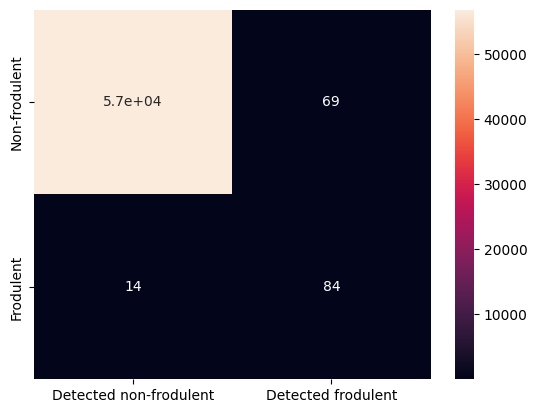

In [59]:
rfm_large_metrics = present_model(rfm_large, rfm_large.predict(X_test_scaled))

Predictably, the larger Random Forest Classifier performs even better with over half of the flagged transactions being fraudulent at the cost of a rather small decrease in **recall**. In terms of the **Overall Score** defined for this problem it is the most effective standalone classifier (falling only slightly behind the Voting Classifier which combines the Random Forest with the K Nearest Neighbors and Logistic Regression models).

### AdaBoost

The AdaBoost models performs even worse than the logistic regression model trained on the SMOTE-augmented dataset. It achieves the same **recall** but even lower **precision** - while taking significantly longer to train. The model's performance could potentially be improved with a larger number of estimators but it is definitely not competitive with the metrics achieved by the Random Forest Classifier.

In [24]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_grid_search_params = {
    'estimator': AdaBoostClassifier(random_state=42, algorithm='SAMME'),
    'param_grid': {'n_estimators': [50], 'learning_rate': [0.01, 0.1, 1.0]},
    'scoring': 'roc_auc',
    'cv': 3
}

In [25]:
ada_boost_cv = GridSearchCV(**adaboost_grid_search_params)
ada_boost_cv.fit(X_train_smote, y_train_smote);

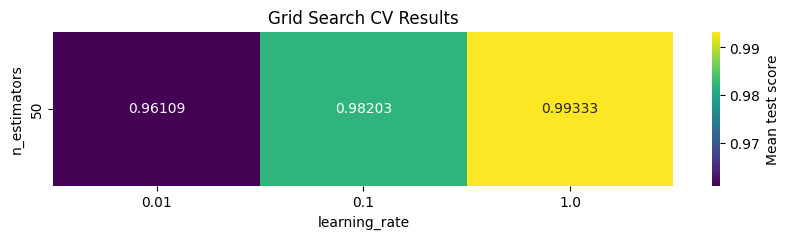

Tuned hpyerparameters: n_estimators=50, learning_rate=1.0
ROC AUC: 0.993326


In [26]:
plot_grid_search_cv_hyperparams_heatmap(grid_search_cv=ada_boost_cv,
                                        param1='learning_rate',
                                        param2='n_estimators',
                                        score_fmt='.5f',
                                        figsize=(10, 2))

best_n_estimators = ada_boost_cv.best_params_['n_estimators']
best_learning_rate = ada_boost_cv.best_params_['learning_rate']
best_score = ada_boost_cv.best_score_

print(f'Tuned hpyerparameters: n_estimators={best_n_estimators}, learning_rate={best_learning_rate}')
print(f'ROC AUC: {best_score:.6f}')

AdaBoostClassifier(algorithm='SAMME', random_state=42)
Accuracy: 0.963642
Precision: 0.041802
Recall: 0.918367
F1: 0.079964
Overall score: 0.363356


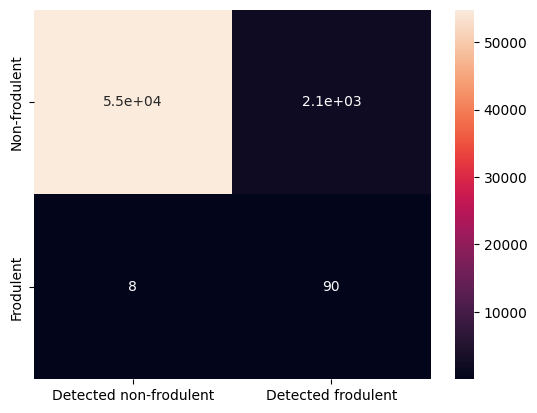

In [60]:
ada_boost_cv_best = ada_boost_cv.best_estimator_
ada_boost_metrics = present_model(ada_boost_cv_best, ada_boost_cv_best.predict(X_test_scaled))

### K Nearest Neighbors

The K Nearest Neighbors achieves only a slightly lower **Overall Score** than the large Random Forest Classifier (with the same **recall** but lower **precision**). However, the model takes longer to train and significantly longer to generate predictions.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_grid_search_params = {
    'estimator': KNeighborsClassifier(),
    'param_grid': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'scoring': 'roc_auc',
    'cv': 3
}

In [29]:
knn_cv = GridSearchCV(**knn_grid_search_params)
knn_cv.fit(X_train_smote, y_train_smote);

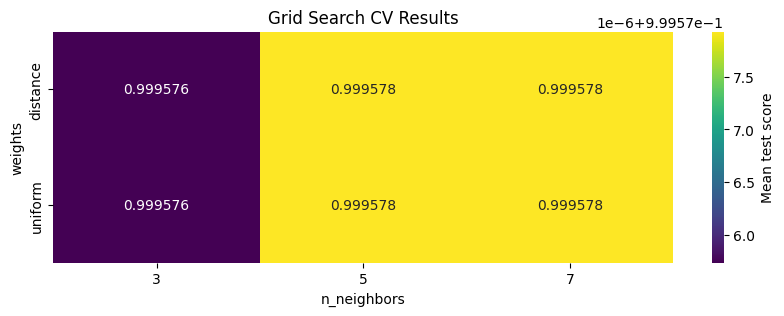

Tuned hpyerparameters: n_neighbors=5, weights=uniform
ROC AUC: 0.999578


In [30]:
plot_grid_search_cv_hyperparams_heatmap(grid_search_cv=knn_cv,
                                        param1='n_neighbors',
                                        param2='weights',
                                        score_fmt='.6f',
                                        figsize=(10, 3))

best_n_neighbors = knn_cv.best_params_['n_neighbors']
best_weights = knn_cv.best_params_['weights']
best_score = knn_cv.best_score_

print(f'Tuned hpyerparameters: n_neighbors={best_n_neighbors}, weights={best_weights}')
print(f'ROC AUC: {best_score:.6f}')

KNeighborsClassifier()
Accuracy: 0.998209
Precision: 0.488372
Recall: 0.857143
F1: 0.622222
Overall score: 0.627222


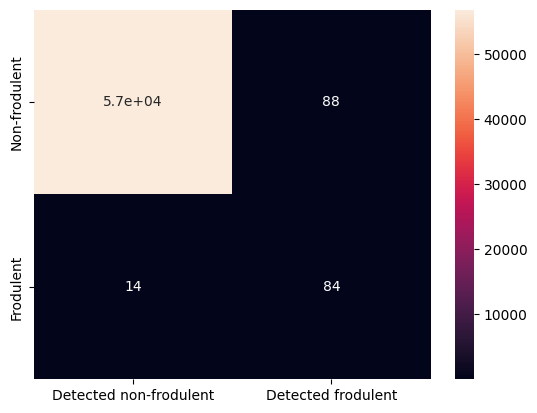

In [61]:
knn_cv_best = knn_cv.best_estimator_
knn_metrics = present_model(knn_cv_best, knn_cv_best.predict(X_test_scaled))

### Neural Network

The neural network model is trained with 5 hidden layers of 32, 32, 16, 16 and 8 neurons respectively. The model is trained for 50 epochs with batch size of 32. The model achieves the same **recall** as the Random Forest Classifier and K Nearest Neighbors model but with significantly lower **precision**. The model's **Overall Score** places above logistic regression and AdaBoost but the two best performers.

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.metrics import AUC

tf.random.set_seed(42)

nnm = Sequential([
    Input(shape=(X_train_smote.shape[1],)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nnm.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC()])
nnm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,993 (11.69 KB)

 Trainable params: 2,993 (11.69 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    tf.config.set_memory_growth(physical_devices[0], True)

nnm.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_split=0.2);

Epoch 1/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - auc: 0.9731 - loss: 0.1694 - val_auc: 0.0000e+00 - val_loss: 0.1485
Epoch 2/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - auc: 0.9912 - loss: 0.1050 - val_auc: 0.0000e+00 - val_loss: 0.1303
Epoch 3/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - auc: 0.9949 - loss: 0.0830 - val_auc: 0.0000e+00 - val_loss: 0.0482
Epoch 4/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - auc: 0.9965 - loss: 0.0691 - val_auc: 0.0000e+00 - val_loss: 0.0388
Epoch 5/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - auc: 0.9976 - loss: 0.0570 - val_auc: 0.0000e+00 - val_loss: 0.0270
Epoch 6/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - auc: 0.9981 - loss: 0.0505 - val_auc: 0.0000e+00 - val_loss: 0.0350
Epoch 7/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - auc: 0.9984 - loss: 0.0454 - val_auc: 0.0000e+00 - val_loss: 0.0230
Epoch 8/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - auc: 0.9986 - loss: 0.0418 - val_auc: 0.0000e+00 - v

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step
<Sequential name=sequential, built=True>
Accuracy: 0.995716
Precision: 0.267516
Recall: 0.857143
F1: 0.407767
Overall score: 0.544808


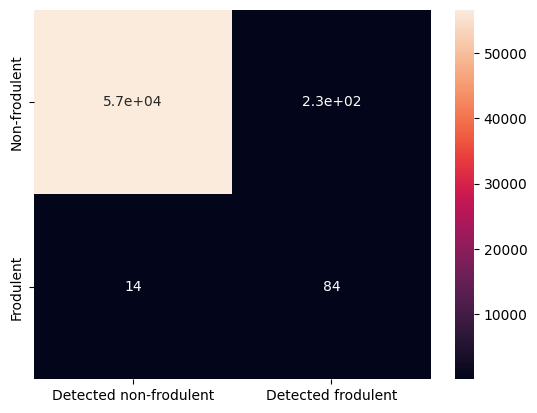

In [62]:
nnm_metrics = present_model(nnm, nnm.predict(X_test_scaled), prediction_transform=lambda x: (x > 0.5))

### Voting Classifier

The Voting Classifier is constructed from the three best performing models (excluding the Neural Network) - Random Forest, K Nearest Neighbors and Logistic Regression. It achieves the highest **Overall Score** of all the models considered in this notebook with a **recall** of almost 89% (higher than both Random Forest and K Nearest Neighbors) while maintaining a **precision** of almost 50%.

However, it is important to keep in mind that if one were to weight **precision** a bit more heavily in the overall evaluation metric this voting classifier could easily be outperformed by the K Nearest Neighbors model or the large Random Forest Classifier.

In [35]:
from sklearn.ensemble import VotingClassifier
    
voting_clf = VotingClassifier(estimators=[
    ('random_forest', rfm_large),
    ('logistic_regression', lrm_cv_best),
    ('knn', knn_cv_best),
], voting='hard')

voting_clf.fit(X_train_smote, y_train_smote);

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(max_depth=12,
                                                     n_estimators=150,
                                                     random_state=42)),
                             ('logistic_regression',
                              LogisticRegression(C=1000000.0, max_iter=1000,
                                                 random_state=42)),
                             ('knn', KNeighborsClassifier())])
Accuracy: 0.998227
Precision: 0.491525
Recall: 0.887755
F1: 0.632727
Overall score: 0.676589


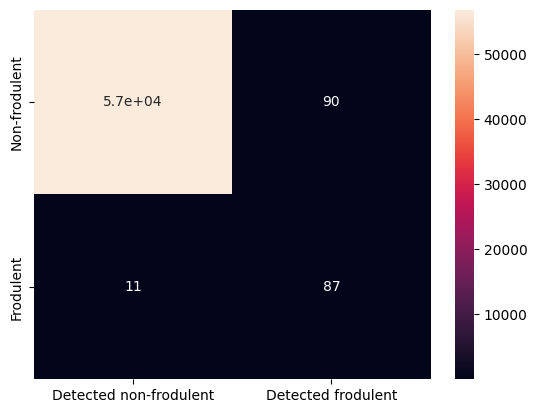

In [63]:
voting_clf_metrics = present_model(voting_clf, voting_clf.predict(X_test_scaled))

## Conclusions

The `Random Forest Classifier`, `K Nearest Neighbors` and the `Voting Classifier` (composed of the two aforementioned models and the `Logistic Regression` model) are the best performing models in the context of the considered problem.

Excluding the `Voting Classifier`, the `Random Forest Classifier` is the best performing standalone model in terms of the **Overall Score** defined for this problem. The `K Nearest Neighbors` model is the most computationally expensive model to train and predict while falling slighly behind the `Random Forest Classifier` in terms of its metrics.

The two worst performing models are the `AdaBoost` and the `Logistic Regression` model. While they both achieve the highest **recall** they do so at the expense of unacceptably low **precision**. The `AdaBoost` model is also one of the most computationally expensive models to train making it the least suitable model for the considered problem.

The `Neural Network` model performs noticably better than the `AdaBoost` and `Logistic Regression` models but falls far behind the `Random Forest Classifier`, `K Nearest Neighbors` and the `Voting Classifier` in terms of **precision**.

### Comparison of models

In [105]:
lrm_metrics |= {'Model': 'Logistic Regression'}
rfm_large_metrics |= {'Model': 'Random Forest'}
ada_boost_metrics |= {'Model': 'AdaBoost'}
knn_metrics |= {'Model': 'KNN'}
nnm_metrics |= {'Model': 'Neural Network'}
voting_clf_metrics |= {'Model': 'Voting Classifier'}

comparison_df = pd.DataFrame([lrm_metrics, rfm_large_metrics, ada_boost_metrics, knn_metrics, nnm_metrics, voting_clf_metrics])
highlight_cols = [col for col in comparison_df.columns if col != 'Model']
comparison_df.sort_values(by='overall_score', ascending=False, inplace=True)

def highlight_max(s):
    return np.where(s == np.nanmax(s.values),
                    'color: darkgreen; background-color: lightgreen; font-weight: bold;',
                    '')

def highlight_min(s):
    return np.where(s == np.nanmin(s.values),
                    'color: darkred; background-color: lightcoral; font-weight: bold;',
                    '')

styled_df = (comparison_df.style
             .apply(highlight_max, subset=highlight_cols, axis=0)
             .apply(highlight_min, subset=highlight_cols, axis=0))
styled_df = comparison_df.style.background_gradient(cmap='RdYlGn', axis=0, subset=highlight_cols)
styled_df


,accuracy,precision,recall,f1,overall_score,Model
5,0.998227,0.491525,0.887755,0.632727,0.676589,Voting Classifier
1,0.998543,0.549020,0.857143,0.669323,0.642665,Random Forest
3,0.998209,0.488372,0.857143,0.622222,0.627222,KNN
4,0.995716,0.267516,0.857143,0.407767,0.544808,Neural Network
0,0.973737,0.057034,0.918367,0.107399,0.400897,Logistic Regression
2,0.963642,0.041802,0.918367,0.079964,0.363356,AdaBoost
